In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx


In [2]:
from google.colab import files
uploaded = files.upload()

Saving data2.csv to data2.csv


In [3]:
df = pd.read_csv('data2.csv')

df.drop(index=df.index[0],axis=0,inplace=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1725 entries, 1 to 1725
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 1725 non-null   float64
 1   year               1725 non-null   object 
 2   active_year        1725 non-null   float64
 3   start_year         1725 non-null   object 
 4   end_year           1725 non-null   object 
 5   type_of_violence   1725 non-null   float64
 6   conflict_new_id    1725 non-null   float64
 7   conflict_name      1725 non-null   object 
 8   dyad_new_id        1725 non-null   float64
 9   dyad_name          1725 non-null   object 
 10  side_a_new_id      1725 non-null   float64
 11  gwnoa              1478 non-null   float64
 12  side_a             1725 non-null   object 
 13  side_b_new_id      1725 non-null   float64
 14  gwnob              0 non-null      float64
 15  side_b             1725 non-null   object 
 16  number_of_sources  1725 

,id,year,active_year,start_year,end_year,type_of_violence,conflict_new_id,conflict_name,dyad_new_id,dyad_name,side_a_new_id,gwnoa,side_a,side_b_new_id,gwnob,side_b,number_of_sources,source_article,source_office,source_date,source_headline,source_original,where_prec,where_coordinates,adm_1,adm_2,latitude,longitude,geom_wkt,priogrid_gid,country,country_id,iso3,region,event_clarity,date_prec,date_start,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,low,best,high
1,163389.0,2004,1.0,2004,2004,1.0,366.0,Indonesia: Aceh,794.0,Government of Indonesia - GAM,155.0,850.0,Government of Indonesia,327.0,NaN,GAM,-1.0,AFP 16/9,NaN,NaN,NaN,Capt. Candra Purnama,4.0,Aceh Province,Aceh Province,NaN,5.55,95.316667,POINT (95.316667 5.550000),138071.0,Indonesia,850.0,IDN,Asia,1.0,1.0,2004-09-14,2004-09-14,0.0,3.0,0.0,0.0,3.0,3,3.0
2,141597.0,1999,1.0,1999,1999,2.0,4929.0,"Dayak, Malay (Indonesia) - Madurese",5539.0,"Dayak, Malay (Indonesia) - Madurese",3825.0,NaN,"Dayak, Malay (Indonesia)",820.0,NaN,Madurese,-1.0,"Reuters, 1999-03-21, FOCUS-Ethnic groups burn ...",NaN,NaN,NaN,"eye witnesses, Reuters reporters, local source...",3.0,Sambas Regency,Kalimantan Barat Province,Sambas Regency,1.32,109.32,POINT (109.320000 1.320000),131619.0,Indonesia,850.0,IDN,Asia,1.0,2.0,1999-03-16,1999-03-21,0.0,0.0,0.0,17.0,17.0,17,32.0
3,141598.0,1999,1.0,1999,1999,2.0,4929.0,"Dayak, Malay (Indonesia) - Madurese",5539.0,"Dayak, Malay (Indonesia) - Madurese",3825.0,NaN,"Dayak, Malay (Indonesia)",820.0,NaN,Madurese,-1.0,"Reuters, 1999-03-23, FOCUS-Indonesia sends tro...",NaN,NaN,NaN,officials,3.0,Sambas Regency,Kalimantan Barat Province,Sambas Regency,1.32,109.32,POINT (109.320000 1.320000),131619.0,Indonesia,850.0,IDN,Asia,2.0,4.0,1999-03-16,1999-03-23,0.0,0.0,0.0,51.0,51.0,51,51.0
4,141620.0,1999,1.0,1999,1999,2.0,4929.0,"Dayak, Malay (Indonesia) - Madurese",5539.0,"Dayak, Malay (Indonesia) - Madurese",3825.0,NaN,"Dayak, Malay (Indonesia)",820.0,NaN,Madurese,-1.0,"BBC Monitoring Asia-Pacific, 1999-03-23, Mobs ...",NaN,NaN,NaN,officials,3.0,Sambas Regency,Kalimantan Barat Province,Sambas Regency,1.32,109.32,POINT (109.320000 1.320000),131619.0,Indonesia,850.0,IDN,Asia,2.0,4.0,1999-03-16,1999-03-25,0.0,0.0,0.0,0.0,0.0,0,11.0
5,141570.0,2000,1.0,2000,2000,2.0,4903.0,Christians (Indonesia) - Muslims (Indonesia),5513.0,Christians (Indonesia) - Muslims (Indonesia),860.0,NaN,Christians (Indonesia),861.0,NaN,Muslims (Indonesia),-1.0,R 4/28/2000 UPDATE 1-Indonesia boosts port sec...,NaN,NaN,NaN,NaN,1.0,Ambon town,Maluku Province,Kota Ambon,-3.705,128.17,POINT (128.170000 -3.705000),124457.0,Indonesia,850.0,IDN,Asia,1.0,2.0,2000-04-26,2000-04-27,0.0,0.0,0.0,7.0,7.0,7,7.0


## Finding and fixing missing data

In [4]:
sum(df.apply(lambda x:sum(x.isnull().values),axis=1)>0)

1725

1725 rows with missing values means each row has at least 1 missing value. We must first find which column that has the most missing values and remove them, as well as using fillna to clean the data for processing

In [5]:
print(df.isnull().sum())

id                      0
year                    0
active_year             0
start_year              0
end_year                0
type_of_violence        0
conflict_new_id         0
conflict_name           0
dyad_new_id             0
dyad_name               0
side_a_new_id           0
gwnoa                 247
side_a                  0
side_b_new_id           0
gwnob                1725
side_b                  0
number_of_sources       0
source_article          9
source_office        1208
source_date          1208
source_headline      1208
source_original       498
where_prec              0
where_coordinates       0
adm_1                   6
adm_2                 251
latitude                0
longitude               0
geom_wkt                0
priogrid_gid            0
country                 0
country_id              0
iso3                    0
region                  0
event_clarity           0
date_prec               0
date_start              0
date_end                0
deaths_a    

The columns with most missing values are:


*   GWNoA (Gledistch and Ward country codes of Side A)
*   GWNoB (Gledistch and Ward country codes of Side B)
*   Source_Office
*   Source_Date
*   Source_Headline
*   Source_Original
*   Source_Article
*   Adm_1
*   Adm_2







In [6]:
dropcolumns = ['gwnoa','gwnob','source_office','source_date','source_headline','source_original','adm_1','adm_2','source_article']
for c in dropcolumns:
  df.drop(c,axis=1,inplace=True)

print(df.isnull().sum())

id                   0
year                 0
active_year          0
start_year           0
end_year             0
type_of_violence     0
conflict_new_id      0
conflict_name        0
dyad_new_id          0
dyad_name            0
side_a_new_id        0
side_a               0
side_b_new_id        0
side_b               0
number_of_sources    0
where_prec           0
where_coordinates    0
latitude             0
longitude            0
geom_wkt             0
priogrid_gid         0
country              0
country_id           0
iso3                 0
region               0
event_clarity        0
date_prec            0
date_start           0
date_end             0
deaths_a             0
deaths_b             0
deaths_civilians     0
deaths_unknown       0
low                  0
best                 0
high                 0
dtype: int64


Now that there are no more missing values, we filter out which data we are going to use for processing.

After lengthy discussions, we decided that the columns that we are going to use are:


In [7]:
uniquecolumns = []
for columns in df:
  uniquecolumns.append(columns)

for c in uniquecolumns:
  print("\n",c,": ")
  uniquevals = df[c].unique()
  print(np.sort(a=uniquevals))




 id : 
[ 68299.  68300.  68319. ... 273583. 274960. 276379.]

 year : 
['1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998'
 '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008'
 '2011' '2012' '2013' '2014' '2015' '2017' '2018']

 active_year : 
[0. 1.]

 start_year : 
['1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998'
 '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008'
 '2011' '2012' '2013' '2014' '2015' '2017' '2018']

 end_year : 
['1989' '1990' '1991' '1992' '1993' '1994' '1995' '1996' '1997' '1998'
 '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008'
 '2011' '2012' '2013' '2014' '2015' '2017' '2018']

 type_of_violence : 
[1. 2. 3.]

 conflict_new_id : 
[ 291.  330.  366.  493.  524.  539.  630. 4755. 4903. 4929.]

 conflict_name : 
['Christians (Indonesia) - Muslims (Indonesia)' 'Dayak - Madurese'
 'Dayak, Malay (Indonesia) - Madurese' 'GAM - Civilians'
 'Government of Indonesia - Civilia

In [27]:
final_col = ['deaths_a','deaths_b','side_a','side_b','type_of_violence']
col1 = ['side_a','deaths_civilians','year','latitude','longitude']
col2 = ['side_b','deaths_civilians','year','latitude','longitude']

final_df1 = df[col1]
final_df2 = df[col2]

final_df1.head(10)
final_df2.head(10)

,side_b,deaths_civilians,year,latitude,longitude
1,GAM,0.0,2004,5.55,95.316667
2,Madurese,0.0,1999,1.32,109.32
3,Madurese,0.0,1999,1.32,109.32
4,Madurese,0.0,1999,1.32,109.32
5,Muslims (Indonesia),0.0,2000,-3.705,128.17
6,Muslims (Indonesia),0.0,2000,0.783333,127.366667
7,Muslims (Indonesia),0.0,1999,-3.567,128.483
8,Civilians,7.0,1998,-1.038102,135.98008
9,CNRT,0.0,1998,-8.6167,126.15
10,GAM,0.0,2002,4.616667,97.616667


In [28]:
a_map = {
    'Christians (Indonesia)':1,
    'Dayak':2,
    'Dayak, Malay (Indonesia)':3,
    'GAM':4,
    'Government of Indonesia':5,
    'Jemaah Islamiya':6,
    'Laskar Jihad':7

}

b_map = {
    'CNRT':1,
    'Civilians':2,
    'GAM':3,
    'Madurese':4,
    'Muslims (Indonesia)':5,
    'OPM':6
}

final_df1['side_a'] = final_df1['side_a'].map(a_map)
final_df2['side_b'] = final_df2['side_b'].map(b_map)

final_df1
final_df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,side_b,deaths_civilians,year,latitude,longitude
1,3,0.0,2004,5.55,95.316667
2,4,0.0,1999,1.32,109.32
3,4,0.0,1999,1.32,109.32
4,4,0.0,1999,1.32,109.32
5,5,0.0,2000,-3.705,128.17
...,...,...,...,...,...
1721,6,3.0,2018,-4.3866,138.232
1722,6,0.0,2018,-3.603146,138.11088
1723,6,0.0,2018,-4.342461,138.219067
1724,2,4.0,2018,-4.228527,138.395902


Importing Scikit

In [29]:
#Libraries for Classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree, neighbors, svm

#Libraries for training and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, mean_squared_error

In [30]:
# features = ['deaths_a','deaths_b','side_a','side_b']
features = ['deaths_civilians','year','latitude','longitude']
target = ['side_a']

x = final_df1[features] #or final_df2[features]
y = final_df1[target] #or final_df2[target]
print(x)
print(y)

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=1752)

      deaths_civilians  year   latitude   longitude
1                  0.0  2004       5.55   95.316667
2                  0.0  1999       1.32      109.32
3                  0.0  1999       1.32      109.32
4                  0.0  1999       1.32      109.32
5                  0.0  2000     -3.705      128.17
...                ...   ...        ...         ...
1721               3.0  2018    -4.3866     138.232
1722               0.0  2018  -3.603146   138.11088
1723               0.0  2018  -4.342461  138.219067
1724               4.0  2018  -4.228527  138.395902
1725               3.0  2018  -4.253232  138.496229

[1725 rows x 4 columns]
      side_a
1          5
2          3
3          3
4          3
5          1
...      ...
1721       5
1722       5
1723       5
1724       5
1725       5

[1725 rows x 1 columns]


In [31]:
classifications = {'SVC': svm.SVC(kernel='linear'),
'Decision_Tree':tree.DecisionTreeClassifier(),
"Gaussian Naive Bayes": GaussianNB(),
'Neural Net':MLPClassifier(),
'K-Nearest_Neighbor':neighbors.KNeighborsClassifier()}

for k,v in list(classifications.items()):

    model = classifications[k]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)
    train_acc = accuracy_score(y_pred=y_train_pred,y_true=y_train)

    y_test_pred = model.predict(x_test)
    test_acc = accuracy_score(y_pred=y_test_pred,y_true=y_test)


    #Print Results-----------------------------------------------------
    print("-------------------------------------------------")
    print('Model:',k)
    print("Train Accuracy:",round(train_acc*100,2),'%')
    print("Test Accuracy:",round(test_acc*100,2),'%')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-------------------------------------------------
Model: SVC
Train Accuracy: 88.82 %
Test Accuracy: 89.19 %
-------------------------------------------------
Model: Decision_Tree
Train Accuracy: 98.92 %
Test Accuracy: 95.37 %
-------------------------------------------------
Model: Gaussian Naive Bayes
Train Accuracy: 37.61 %
Test Accuracy: 33.2 %
-------------------------------------------------
Model: Neural Net
Train Accuracy: 26.26 %
Test Accuracy: 27.61 %
-------------------------------------------------
Model: K-Nearest_Neighbor
Train Accuracy: 95.28 %
Test Accuracy: 94.79 %


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [32]:
#Functions to compute True Positives, True Negatives, False Positives, and False Negatives
def true_positive(y_true,y_pred):
  tp = 0
  for yt,yp in zip(y_true,y_pred):
    if yt == 1 and yp == 1:
      tp += 1
    
  return tp

def true_negative(y_true,y_pred):
  tn = 0
  for yt, yp in zip(y_true,y_pred):
    if yt == 0 and yp == 0:
      tn += 1
  
  return tn

def false_positive(y_true,y_pred):
  fp = 0
  for yt, yp in zip(y_true,y_pred):
    if yt == 0 and yp == 1:
      fp += 1
  
  return fp

def false_negative(y_true,y_pred):
  fn = 0
  for yt, yp in zip(y_true,y_pred):
    if yt == 1 and yp == 0:
      fn += 1
  
  return fn


#Functions to calculate Micro averaged precision and recall score
def micro_recall(y_true,y_pred):
  num_classes = len(np.unique(y_true))

  tp = 0
  fn = 0
  
  for class_ in y_true.unique():
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    tp += true_positive(temp_true,temp_pred)

    fn += false_negative(temp_true,temp_pred)

  recall = tp/(tp+fn)
  return recall

def micro_precision(y_true,y_pred):
   num_classes = len(np.unique(y_true))

   tp = 0
   fp = 0

   for class_ in y_true.unique():
     temp_true = [1 if p == class_ else 0 for p in y_true]
     temp_pred = [1 if p == class_ else 0 for p in y_pred]

     tp += true_positive(temp_true,temp_pred)
     fp += false_positive(temp_true,temp_pred)
     
   precision = tp / (tp + fp)
   return precision
    




def macro_f1(y_true,y_pred):

  num_classes = len(np.unique(y_true))

  f1 = 0

  for class_ in list(y_true.unique()):
    temp_true = [1 if p == class_ else 0 for p in y_true]
    temp_pred = [1 if p == class_ else 0 for p in y_pred]

    tp = true_positive(temp_true,temp_pred)
    fn = false_negative(temp_true,temp_pred)
    fp = false_positive(temp_true,temp_pred)

    temp_recall = tp / (tp + fn + 1e-6)
    temp_precision = tp / (tp + fp + 1e-6)

    temp_f1 = 2 * temp_precision * temp_recall / (temp_precision + temp_recall + 1e-6)

    f1 += temp_f1

    f1 /= num_classes

    return f1


def micro_f1(y_true,y_pred):
  P = micro_precision(y_true,y_pred)

  R = micro_recall(y_true,y_pred)
  
  f1 = 2*P*R / (P+R)

  return f1

In [26]:
for k,v in list(classifications.items()):

    model = classifications[k]
    model.fit(x_train,y_train)

    y_train_pred = model.predict(x_train)

    y_test_pred = model.predict(x_test)

    print(k)
    print('MACRO ',macro_f1(y_test,y_test_pred))
    print('MICRO ',micro_f1(y_test,y_test_pred))

    # log_loss(y_train,y_test)
    # RocCurveDisplay.from_predictions(y_test,y_test_pred)
    # plt.show()

    # #ConfusionMatrix-------------------
    # ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
    # plt.show()

    #Classification Report

SVC


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AttributeError: ignored

In [ ]:
G = nx.Graph()
G.add_nodes_from(['side_a','side_b' ])
H = nx.path_graph(10)
G.add_nodes_from(H)
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)

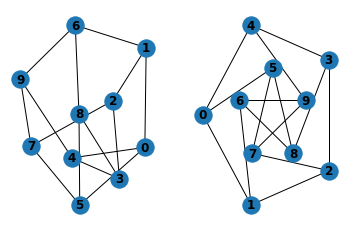

In [ ]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')